# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Taufik Hidayah
- **Email:** alhidayahtaufik010@gmail.com
- **ID Dicoding:** leonhardumar

## Menentukan Pertanyaan Bisnis

- Bagaimana penjualan dan revenue perusahaan dari waktu ke waktu?
- Bagaimana sebaran lokasi pelanggan perusahaan?
- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.express as px

# dataframe setting
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format

sns.set()
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

Data diambil dari database Perusahaan E-Commerce XYZ yang terdiri dari tabel berikut:
- **customers_dataset**: tabel yang berisi informasi pelanggan
- **geolocation_dataset**: tabel yang berisi informasi geolokasi seperti kode pos dan koordinat dari lokasi tersebut
- **order_items_dataset**: menggambarkan detail produk dalam setiap pesanan
- **order_payments_dataset**: mencatat informasi pembayaran terkait pesanan
- **order_reviews_dataset**: tabel yang menyimpan ulasan pelanggan terkait pesanan atau produk
- **orders_dataset**: tabel utama yang menyimpan informasi pesanan
- **product_category_name_translation**: penerjemahan nama kategori produk menjadi bahasa inggris
- **products_dataset**: berisikan informasi tentang detail produk
- **sellers_dataset**: menyimpan detail informasi tentang sellers

#### Customers Dataset

In [2]:
def gather_data(file_path: str):
    df = pd.read_csv(file_path)
    display(df.head(5))
    df.info()
    display(df.describe(include="all").T)

    return df

In [3]:
customers = gather_data("data/customers_dataset.csv")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,99441,99441,274fa6071e5e17fe303b9748641082c8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_zip_code_prefix,"99,441.00",NaN,NaN,NaN,"35,137.47","29,797.94","1,003.00","11,347.00","24,416.00","58,900.00","99,990.00"
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- Pelanggan menyebar di 27 provinsi dengan 4,119 kota, dengan kemunculan kota paling banyak adalah Sao Paolo sebanyak 15,540 pelanggan.

#### Geolocation Dataset

In [4]:
geolocation = gather_data("data/geolocation_dataset.csv")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.64,sao paulo,SP
1,1046,-23.55,-46.64,sao paulo,SP
2,1046,-23.55,-46.64,sao paulo,SP
3,1041,-23.54,-46.64,sao paulo,SP
4,1035,-23.54,-46.64,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,"1,000,163.00",NaN,NaN,NaN,"36,574.17","30,549.34","1,001.00","11,075.00","26,530.00","63,504.00","99,990.00"
geolocation_lat,"1,000,163.00",NaN,NaN,NaN,-21.18,5.72,-36.61,-23.60,-22.92,-19.98,45.07
geolocation_lng,"1,000,163.00",NaN,NaN,NaN,-46.39,4.27,-101.47,-48.57,-46.64,-43.77,121.11
geolocation_city,1000163,8011,sao paulo,135800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_state,1000163,27,SP,404268,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- terdapat 1,000,163 lokasi unik pada dataset geolocation yang nantinya bisa dimanfaatkan untuk menentukan detail lokasi dari tabel-tabel lain salah satu contohnya adalah tabel customers.

integrate customers data with geolocation coordinate information

In [5]:
customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)
geolocation.rename(
    columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True
)

In [6]:
customers = customers.join(
    geolocation,
    on="zip_code_prefix",
    how="left",
    lsuffix="_customer",
    rsuffix="_geo",
).drop(
    columns=[
        "zip_code_prefix_geo",
        "zip_code_prefix",
        "geolocation_city",
        "geolocation_state",
    ]
)

#### Order Items Dataset

In [7]:
order_items = gather_data("data/order_items_dataset.csv")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,"112,650.00",NaN,NaN,NaN,1.20,0.71,1.00,1.00,1.00,1.00,21.00
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,"112,650.00",NaN,NaN,NaN,120.65,183.63,0.85,39.90,74.99,134.90,"6,735.00"
freight_value,"112,650.00",NaN,NaN,NaN,19.99,15.81,0.00,13.08,16.26,21.15,409.68


**Insight:**
- rata-rata biaya pengiriman yang dibebankan ke pelanggan adalah sekitar R$20 (20 brazilian real)
- rata-rata harga product yang dipesan adalah R$120.65
- terdapat 3095 penjual yang aktif melakukan transaksi 

#### Order Payments Dataset

In [8]:
order_payments = gather_data("data/order_payments_dataset.csv")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,"103,886.00",NaN,NaN,NaN,1.09,0.71,1.00,1.00,1.00,1.00,29.00
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,"103,886.00",NaN,NaN,NaN,2.85,2.69,0.00,1.00,1.00,4.00,24.00
payment_value,"103,886.00",NaN,NaN,NaN,154.10,217.49,0.00,56.79,100.00,171.84,"13,664.08"


**Insights:**
- terdapat 5 metode pembayaran dengan metode pembayaran yang paling sering digunakan adalah credit card
- rata-rata jumlah cicilan adalah sebanyak 3 cicilan (pembulatan 2.85)
- rata-rata jumlah cicilan yang dibayarkan adalah 152.1 brazilian real

#### Orders Dataset

In [9]:
orders = gather_data("data/orders_dataset.csv")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,count,unique,top,freq
order_id,99441,99441,66dea50a8b16d9b4dee7af250b4be1a5,1
customer_id,99441,99441,edb027a75a1449115f6b43211ae02a24,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:05:26,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 19:36:48,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


**Insight:**
- Terdapat 8 jenis order_status sebagian besar order status adalah delivered atau sudah terkirim

#### Products Dataset

In [10]:
products = gather_data("data/products_dataset.csv")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,32951,32951,106392145fca363410d287a815be6de4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,"32,341.00",NaN,NaN,NaN,48.48,10.25,5.00,42.00,51.00,57.00,76.00
product_description_lenght,"32,341.00",NaN,NaN,NaN,771.50,635.12,4.00,339.00,595.00,972.00,"3,992.00"
product_photos_qty,"32,341.00",NaN,NaN,NaN,2.19,1.74,1.00,1.00,1.00,3.00,20.00
product_weight_g,"32,949.00",NaN,NaN,NaN,"2,276.47","4,282.04",0.00,300.00,700.00,"1,900.00","40,425.00"
product_length_cm,"32,949.00",NaN,NaN,NaN,30.82,16.91,7.00,18.00,25.00,38.00,105.00
product_height_cm,"32,949.00",NaN,NaN,NaN,16.94,13.64,2.00,8.00,13.00,21.00,105.00
product_width_cm,"32,949.00",NaN,NaN,NaN,23.20,12.08,6.00,15.00,20.00,30.00,118.00


In [11]:
products.shape

(32951, 9)

In [12]:
product_translation = pd.read_csv("data/product_category_name_translation.csv")

In [13]:
product_translation.shape

(71, 2)

In [14]:
product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [15]:
products = products.merge(product_translation, on="product_category_name", how="left")

**Insight:**
- terdapat 73 jenis kategori produk dengan kategori produk yang paling seting muncul adalah cama_mesa_banho atau bed_bath_table dalam bahasa inggris
- rata-rata berat produk adalah sekitar 2.2kg

#### Sellers Dataset

In [16]:
sellers = gather_data("data/sellers_dataset.csv")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seller_id,3095,3095,9e25199f6ef7e7c347120ff175652c3b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_zip_code_prefix,"3,095.00",NaN,NaN,NaN,"32,291.06","32,713.45","1,001.00","7,093.50","14,940.00","64,552.50","99,730.00"
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- mayoritas penjual berada di kota sao paulo

### Assessing Data

In [17]:
def assess_data_quality(df: pd.DataFrame):
    print(f"Missing values:\n{df.isna().sum()}\n")  # missing values
    print(f"Duplicates record: {df.duplicated().sum()}\n")  # duplicates
    print("Dataset information: ")  # data types
    print(df.info())
    print("\nData description: ")
    display(df.describe(include="all").T)

*customers*

In [18]:
assess_data_quality(customers)

Missing values:
customer_id                 0
customer_unique_id          0
zip_code_prefix_customer    0
customer_city               0
customer_state              0
geolocation_lat             0
geolocation_lng             0
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   zip_code_prefix_customer  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99441 non-null  float64
 6   geolocation_lng           99441 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB
None

Data description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,99441,99441,274fa6071e5e17fe303b9748641082c8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code_prefix_customer,"99,441.00",NaN,NaN,NaN,"35,137.47","29,797.94","1,003.00","11,347.00","24,416.00","58,900.00","99,990.00"
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_lat,"99,441.00",NaN,NaN,NaN,-23.55,0.05,-23.88,-23.58,-23.55,-23.51,-23.40
geolocation_lng,"99,441.00",NaN,NaN,NaN,-46.64,0.05,-46.79,-46.66,-46.65,-46.62,-46.39


**Insight:**
- *optional dilakukan pengubahan tipe data pada variable customer_state dari yang tadinya object menjadi category untuk efisiensi memory

*geolocation*

In [19]:
assess_data_quality(geolocation)

Missing values:
zip_code_prefix      0
geolocation_lat      0
geolocation_lng      0
geolocation_city     0
geolocation_state    0
dtype: int64

Duplicates record: 261831

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   zip_code_prefix    1000163 non-null  int64  
 1   geolocation_lat    1000163 non-null  float64
 2   geolocation_lng    1000163 non-null  float64
 3   geolocation_city   1000163 non-null  object 
 4   geolocation_state  1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Data description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
zip_code_prefix,"1,000,163.00",NaN,NaN,NaN,"36,574.17","30,549.34","1,001.00","11,075.00","26,530.00","63,504.00","99,990.00"
geolocation_lat,"1,000,163.00",NaN,NaN,NaN,-21.18,5.72,-36.61,-23.60,-22.92,-19.98,45.07
geolocation_lng,"1,000,163.00",NaN,NaN,NaN,-46.39,4.27,-101.47,-48.57,-46.64,-43.77,121.11
geolocation_city,1000163,8011,sao paulo,135800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_state,1000163,27,SP,404268,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- *optional dilakukan pengubahan tipe data pada variable geolocation_state dari yang tadinya object menjadi category untuk efisiensi memory

*order_items*

In [20]:
assess_data_quality(order_items)

Missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Data description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,"112,650.00",NaN,NaN,NaN,1.20,0.71,1.00,1.00,1.00,1.00,21.00
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,"112,650.00",NaN,NaN,NaN,120.65,183.63,0.85,39.90,74.99,134.90,"6,735.00"
freight_value,"112,650.00",NaN,NaN,NaN,19.99,15.81,0.00,13.08,16.26,21.15,409.68


**Insight:**
- perlu ada penyesuaian **tipe data** pada variabel **shipping_limit_date** menjadi datetime
- terdapat harga barang yang sangat mahal sekali yaitu diatas R$6000

*order_payments*

In [21]:
assess_data_quality(order_payments)

Missing values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Data description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,"103,886.00",NaN,NaN,NaN,1.09,0.71,1.00,1.00,1.00,1.00,29.00
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,"103,886.00",NaN,NaN,NaN,2.85,2.69,0.00,1.00,1.00,4.00,24.00
payment_value,"103,886.00",NaN,NaN,NaN,154.10,217.49,0.00,56.79,100.00,171.84,"13,664.08"


**Insight:**
- *optional dilakukan pengubahan tipe data pada variable payment_type dari yang tadinya object menjadi category untuk efisiensi memory

*orders*

In [22]:
assess_data_quality(orders)

Missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 

,count,unique,top,freq
order_id,99441,99441,66dea50a8b16d9b4dee7af250b4be1a5,1
customer_id,99441,99441,edb027a75a1449115f6b43211ae02a24,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:05:26,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 19:36:48,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


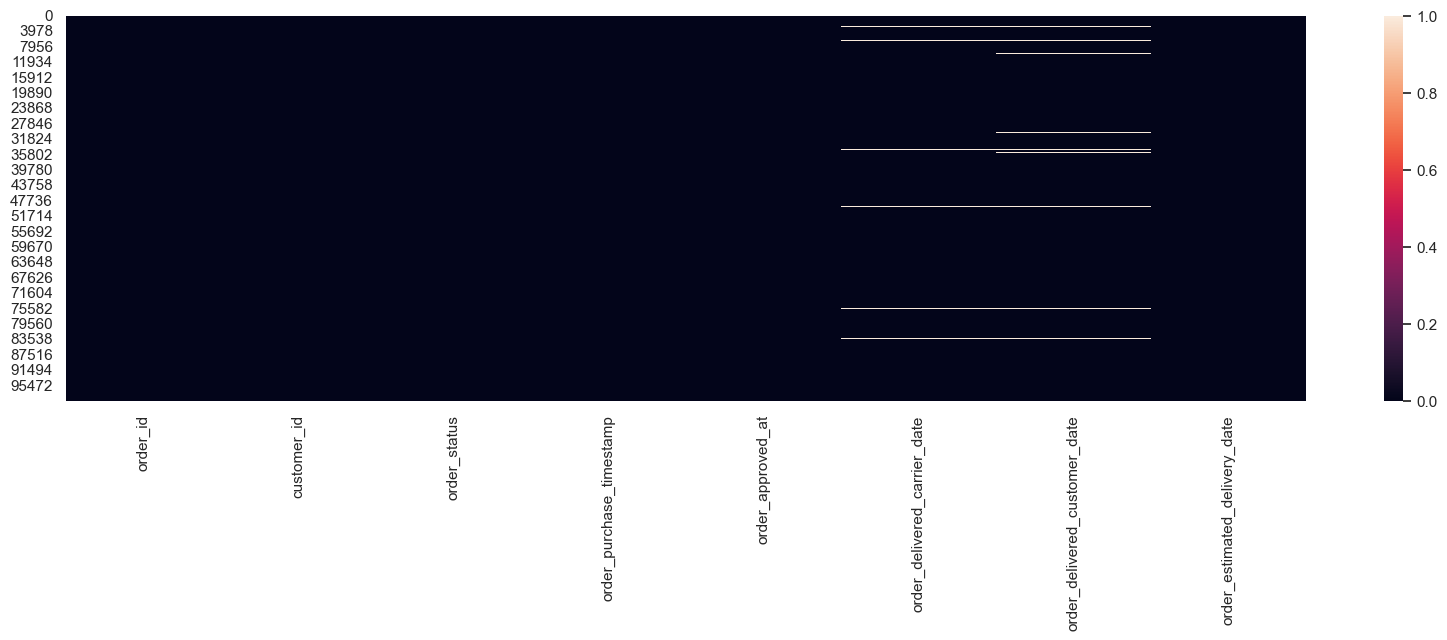

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.heatmap(orders.isna(), ax=ax);

In [24]:
summary = orders.groupby("order_status").agg(
    total_orders=("order_id", "count"),
    missing_approved=("order_approved_at", lambda x: x.isnull().sum()),
    missing_carrier_date=("order_delivered_carrier_date", lambda x: x.isnull().sum()),
    missing_customer_date=("order_delivered_customer_date", lambda x: x.isnull().sum()),
)

summary

,total_orders,missing_approved,missing_carrier_date,missing_customer_date
order_status,,,,
approved,2,0,2,2
canceled,625,141,550,619
created,5,5,5,5
delivered,96478,14,2,8
invoiced,314,0,314,314
processing,301,0,301,301
shipped,1107,0,0,1107
unavailable,609,0,609,609


In [25]:
orders[orders.isna().sum(axis=1) == 2].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1636
order_delivered_customer_date    1636
order_estimated_delivery_date       0
dtype: int64

In [26]:
orders[orders.isna().sum(axis=1) == 1].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        1
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64

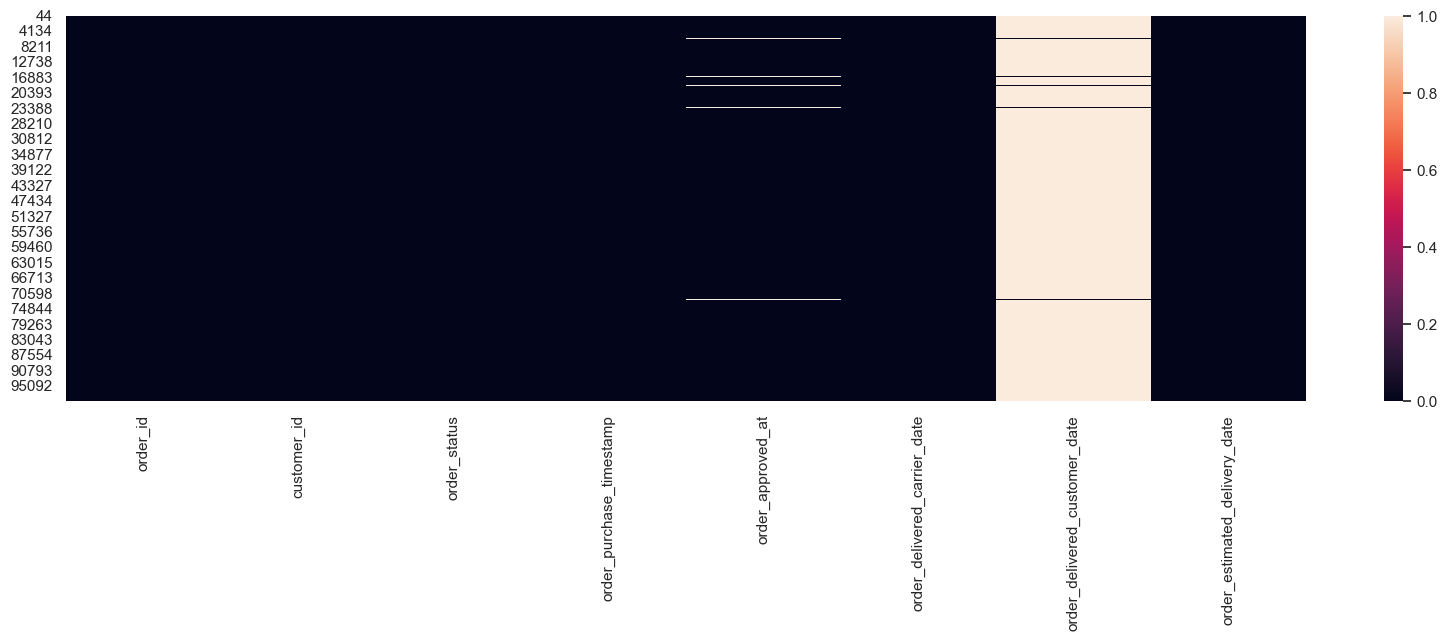

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.heatmap(orders[orders.isna().sum(axis=1) == 1].isna(), ax=ax);

In [28]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight:**
- *optional dilakukan pengubahan tipe data pada variable order_status dari yang tadinya object menjadi category untuk efisiensi memory
- penyesuaian tipe data menjadi datetime pada variables order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- terdapat missing value pada beberapa variable yaitu order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

**Penanganan:**
- missing value pada order_status canceled dan unavailable akan diabaikan saja karena pembatalan pesanan bisa terjadi di proses mana saja sehingga menghasilkan data kosong, sementara untuk unavailable mengindikasikan bahwa produk tidak tersedia sehingga tidak akan ada proses lanjutan
- sementara untuk mv pada kategori lain akan saya imputasi dengan selisih rata-rata pengiriman proses sekarang dengan yang sebelumnya berdasarkan lokasi kota pelanggan.

*products*

In [29]:
assess_data_quality(products)

Missing values:
product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,32951,32951,106392145fca363410d287a815be6de4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,"32,341.00",NaN,NaN,NaN,48.48,10.25,5.00,42.00,51.00,57.00,76.00
product_description_lenght,"32,341.00",NaN,NaN,NaN,771.50,635.12,4.00,339.00,595.00,972.00,"3,992.00"
product_photos_qty,"32,341.00",NaN,NaN,NaN,2.19,1.74,1.00,1.00,1.00,3.00,20.00
product_weight_g,"32,949.00",NaN,NaN,NaN,"2,276.47","4,282.04",0.00,300.00,700.00,"1,900.00","40,425.00"
product_length_cm,"32,949.00",NaN,NaN,NaN,30.82,16.91,7.00,18.00,25.00,38.00,105.00
product_height_cm,"32,949.00",NaN,NaN,NaN,16.94,13.64,2.00,8.00,13.00,21.00,105.00
product_width_cm,"32,949.00",NaN,NaN,NaN,23.20,12.08,6.00,15.00,20.00,30.00,118.00
product_category_name_english,32328,71,bed_bath_table,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
products.query("product_category_name.isna()")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.00,17.00,14.00,12.00,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.00,16.00,7.00,20.00,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.00,20.00,20.00,20.00,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,"18,500.00",41.00,30.00,41.00,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.00,35.00,7.00,12.00,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,"1,800.00",30.00,20.00,70.00,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.00,30.00,10.00,23.00,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.00,21.00,8.00,16.00,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,"1,300.00",45.00,16.00,45.00,NaN


In [31]:
products[products.isna().sum(axis=1) >= 7]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
products.query("product_weight_g.isna()")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.00,865.00,3.00,NaN,NaN,NaN,NaN,baby
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**

- terdapat missing value pada 8 dari 9 kolom pada dataset products. dengan product_id dari produk-produk tersebut lengkap
- terdapat 3 jenis missing value pada dataset products yaitu:
    1. products yang tidak memiliki kategori, panjang nama, panjang deskripsi dan kuantitas
    2. produk yang hanya memiliki product_id
    3. product yang tidak memiliki informasi ukuran volume dan berat dari product

**Penanganan:**
- untuk product_category_name akan diisi dengan unknown_product
- untuk variable lain dengan tipe data number akan diisi dengan 0

*selllers*

In [33]:
assess_data_quality(sellers)

Missing values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Duplicates record: 0

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Data description: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seller_id,3095,3095,9e25199f6ef7e7c347120ff175652c3b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_zip_code_prefix,"3,095.00",NaN,NaN,NaN,"32,291.06","32,713.45","1,001.00","7,093.50","14,940.00","64,552.50","99,730.00"
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Quality Assesment Report

**Report:**
- Penyesuaian Tipe Data:
    - customers["customer_state"] -> category
    - geolocation["geolocation_state"] -> category
    - order_payment["payment_type"] -> category
    - orders["order_status"] -> category
    - orders[all datetime variable] -> datetime
    - order_items["shipping_limit_date"] -> datetime
- Data Tidak Lengkap:
    - orders -> order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
    - products -> semua kolom kecuali product_id
- Indikasi Outlier:
    - order_items -> price

### Cleaning Data

#### Penyesuaian Tipe Data

**object to category**

In [34]:
customers.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   zip_code_prefix_customer  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99441 non-null  float64
 6   geolocation_lng           99441 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 31.1 MB


In [35]:
customers["customer_state"] = customers["customer_state"].astype("category")
geolocation["geolocation_state"] = geolocation["geolocation_state"].astype("category")
order_payments["payment_type"] = order_payments["payment_type"].astype("category")
orders["order_status"] = orders["order_status"].astype("category")

In [36]:
customers.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_unique_id        99441 non-null  object  
 2   zip_code_prefix_customer  99441 non-null  int64   
 3   customer_city             99441 non-null  object  
 4   customer_state            99441 non-null  category
 5   geolocation_lat           99441 non-null  float64 
 6   geolocation_lng           99441 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 25.6 MB


penggunaan memory berkurang sekitar 5 mb. praktik ini sangat dianjurkan pada dataset dengan ukuran besar

**object to datetime**

In [37]:
orders_datetime_var = orders.columns[3:].tolist()

In [38]:
for col in orders_datetime_var:
    orders[col] = pd.to_datetime(orders[col])

In [39]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [40]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

#### Missing Values Handling

**orders**

In [41]:
def impute_orders_missing_data(df, col_to_impute, col_before, customer_state):
    temp_ = df.query(
        f"customer_state == '{customer_state}' and "
        f"order_status not in ['canceled', 'unavailable'] and {col_to_impute}.notna()"
    )
    temp_null_ = df.query(
        f"customer_state == '{customer_state}' and "
        f"order_status not in ['canceled', 'unavailable'] and {col_to_impute}.isna()"
    )

    if temp_.empty or temp_null_.empty:
        print(f"No imputable data for customer_state: {customer_state}")
        return df[col_to_impute]

    avg_temp_ = (temp_[col_to_impute] - temp_[col_before]).mean()

    if pd.isna(avg_temp_):
        print(
            f"Average calculation resulted in NaN for customer_state: {customer_state}"
        )
        return df[col_to_impute]

    df.loc[
        (df["customer_state"] == customer_state)
        & (df["order_status"].isin(["canceled", "unavailable"]) == False)
        & (df[col_to_impute].isna()),
        col_to_impute,
    ] = temp_null_[col_before] + avg_temp_

    return df[col_to_impute]


In [42]:
orders_customers = pd.merge(orders, customers, on="customer_id", how="left")

In [43]:
orders_customers.query("order_status not in ['canceled', 'unavailable']").groupby(
    "customer_state"
).agg(
    total_orders=("order_id", "count"),
    missing_approved=("order_approved_at", lambda x: x.isnull().sum()),
    missing_carrier_date=("order_delivered_carrier_date", lambda x: x.isnull().sum()),
    missing_customer_date=("order_delivered_customer_date", lambda x: x.isnull().sum()),
)

,total_orders,missing_approved,missing_carrier_date,missing_customer_date
customer_state,,,,
AC,81,0,0,1
AL,411,0,5,14
AM,147,0,0,2
AP,68,0,1,1
BA,3344,0,20,88
CE,1323,1,6,44
DF,2121,1,11,41
ES,2018,0,6,23
GO,1998,0,10,41


In [44]:
for state in orders_customers["customer_state"].unique():
    orders_customers["order_approved_at"] = impute_orders_missing_data(
        orders_customers,
        col_to_impute="order_approved_at",
        col_before="order_purchase_timestamp",
        customer_state=state,
    )


No imputable data for customer_state: BA
No imputable data for customer_state: GO
No imputable data for customer_state: RN
No imputable data for customer_state: SC
No imputable data for customer_state: RR
No imputable data for customer_state: PE
No imputable data for customer_state: TO
No imputable data for customer_state: SE
No imputable data for customer_state: MT
No imputable data for customer_state: PB
No imputable data for customer_state: PA
No imputable data for customer_state: RO
No imputable data for customer_state: ES
No imputable data for customer_state: AP
No imputable data for customer_state: MS
No imputable data for customer_state: PI
No imputable data for customer_state: AL
No imputable data for customer_state: AC
No imputable data for customer_state: AM


In [45]:
for state in orders_customers["customer_state"].unique():
    orders_customers["order_delivered_carrier_date"] = impute_orders_missing_data(
        orders_customers,
        col_to_impute="order_delivered_carrier_date",
        col_before="order_approved_at",
        customer_state=state,
    )


No imputable data for customer_state: RR
No imputable data for customer_state: AC
No imputable data for customer_state: AM


In [46]:
for state in orders_customers["customer_state"].unique():
    orders_customers["order_delivered_customer_date"] = impute_orders_missing_data(
        orders_customers,
        col_to_impute="order_delivered_customer_date",
        col_before="order_delivered_carrier_date",
        customer_state=state,
    )


In [47]:
orders_customers.query("order_status not in ['canceled', 'unavailable']").groupby(
    "customer_state"
).agg(
    total_orders=("order_id", "count"),
    missing_approved=("order_approved_at", lambda x: x.isnull().sum()),
    missing_carrier_date=("order_delivered_carrier_date", lambda x: x.isnull().sum()),
    missing_customer_date=("order_delivered_customer_date", lambda x: x.isnull().sum()),
)

,total_orders,missing_approved,missing_carrier_date,missing_customer_date
customer_state,,,,
AC,81,0,0,0
AL,411,0,0,0
AM,147,0,0,0
AP,68,0,0,0
BA,3344,0,0,0
CE,1323,0,0,0
DF,2121,0,0,0
ES,2018,0,0,0
GO,1998,0,0,0


In [48]:
orders_customers.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1159
order_delivered_customer_date    1228
order_estimated_delivery_date       0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat                     0
geolocation_lng                     0
dtype: int64

In [49]:
orders_customers.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1159
order_delivered_customer_date    1228
order_estimated_delivery_date       0
customer_unique_id                  0
zip_code_prefix_customer            0
customer_city                       0
customer_state                      0
geolocation_lat                     0
geolocation_lng                     0
dtype: int64

In [50]:
orders_customers.query("order_status not in ['canceled', 'unavailable']").isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
zip_code_prefix_customer         0
customer_city                    0
customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
dtype: int64

**products**

In [51]:
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

product_category_name diisi dengan unknown category

In [52]:
products["product_category_name"].fillna("unknown category", inplace=True)
products["product_category_name_english"].fillna("unknown category", inplace=True)

In [53]:
products.isna().sum()

product_id                         0
product_category_name              0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

untuk tipe data number akan diisi dengan 0

In [54]:
products.fillna(0, inplace=True)

In [55]:
products.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Customers

In [56]:
customers.head()

,customer_id,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-23.56,-46.66
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.56,-46.64
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.55,-46.63
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.56,-46.64
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-23.56,-46.65


In [57]:
customers[["customer_id", "customer_unique_id"]].nunique()

customer_id           99441
customer_unique_id    96096
dtype: int64

In [58]:
customers.groupby(by=["customer_city"])["customer_unique_id"].nunique().sort_values(
    ascending=False
).reset_index()

,customer_city,customer_unique_id
0,sao paulo,14984
1,rio de janeiro,6620
2,belo horizonte,2672
3,brasilia,2069
4,curitiba,1465
...,...,...
4114,pedranopolis,1
4115,pedrao,1
4116,matias olimpio,1
4117,pedras altas,1


In [59]:
customers.groupby(by=["customer_state"]).agg({"customer_city": "nunique"}).sort_values(
    ascending=False, by="customer_city"
).reset_index().rename(
    columns={
        "customer_city": "total_city_in_state",
    }
)

,customer_state,total_city_in_state
0,MG,745
1,SP,629
2,RS,379
3,PR,364
4,BA,353
5,SC,240
6,GO,178
7,CE,161
8,PE,152
9,RJ,149


In [60]:
customers.groupby(by=["customer_state"]).agg(
    {"customer_city": "nunique", "customer_unique_id": "nunique"}
).sort_values(ascending=False, by="customer_unique_id").reset_index().rename(
    columns={
        "customer_unique_id": "total_customer",
        "customer_city": "total_city_in_state",
    }
)

,customer_state,total_city_in_state,total_customer
0,SP,629,40302
1,RJ,149,12384
2,MG,745,11259
3,RS,379,5277
4,PR,364,4882
5,SC,240,3534
6,BA,353,3277
7,DF,6,2075
8,ES,95,1964
9,GO,178,1952


**Insight:**
- sebaran lokasi pelanggan terbanyak berdasarkan kota tersebar di sao paulo sebanyak 14984 pelanggan, disusul oleh rio de janeiro dan belo horizonte masing-masing sebanyak 6620 dan 2672
- negara bagian pada data customer dengan kota terbanyak adalah MG, SP dan RS dengan jumlah kota yaitu 745, 629 dan 379.
- sementara untuk sebaran pelanggan sebanyak lebih dari 10rb berdasarkan negara bagian yaitu pertama SP sebanyak 40302, RJ sebanyak 12384, dan MJ sebanyak 11259. 

### Orders and Customers

In [61]:
# all_orders = pd.merge(orders_customers, order_items_products, on='order_id')
# all_orders = pd.merge(all_orders, order_payments, on="order_id")

**jumlah order berdasarkan kota**

In [62]:
orders_customers.groupby(by="customer_city")["order_id"].count().sort_values(
    ascending=False
).reset_index().rename(columns={"order_id": "total_order"}).head(10)

,customer_city,total_order
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


**jumlah order berdasarkan negara bagian**

In [63]:
orders_customers.groupby(by="customer_state")["order_id"].count().sort_values(
    ascending=False
).reset_index().rename(columns={"order_id": "total_order"}).head(10)

,customer_state,total_order
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


**Insight:**
- penjualan terbanyak berdasarkan kota ada pada sao paolo, rio de janeiro, dan belo horizonte. dengan total pesanan 15540, 6882, dan 2773 secara berurutan.
- penjualan terbanyak berdasarkan negara bagian ada pada SP dengan 41746 pesanan, disusul dengan RK 12852 pesanan dan MG dengan total pemesanan 11635

### Orders Items

In [64]:
order_items_products = pd.merge(order_items, products, on="product_id", how="left")

In [65]:
order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.00,598.00,4.00,650.00,28.00,9.00,14.00,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.00,239.00,2.00,"30,000.00",50.00,30.00,40.00,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.00,695.00,2.00,"3,050.00",33.00,13.00,33.00,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.00,480.00,1.00,200.00,16.00,10.00,15.00,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.00,409.00,1.00,"3,750.00",35.00,40.00,30.00,garden_tools


**jumlah pesanan berdasarkan product category**

In [66]:
order_items_products.groupby(by="product_category_name_english").agg(
    total_product=("product_id", "nunique"),
    total_order=("order_id", "nunique"),
    total_price=("price", "sum"),
    total_freight=("freight_value", "sum"),
).sort_values(by="total_order", ascending=False).reset_index()

,product_category_name_english,total_product,total_order,total_price,total_freight
0,bed_bath_table,3029,9417,"1,036,988.68","204,693.04"
1,health_beauty,2444,8836,"1,258,681.34","182,566.73"
2,sports_leisure,2867,7720,"988,048.97","168,607.51"
3,computers_accessories,1639,6689,"911,954.32","147,318.08"
4,furniture_decor,2657,6449,"729,762.49","172,749.30"
...,...,...,...,...,...
67,arts_and_craftmanship,19,23,"1,814.01",370.13
68,la_cuisine,10,13,"2,054.99",333.55
69,cds_dvds_musicals,1,12,730.00,224.99
70,fashion_childrens_clothes,5,8,569.85,95.51


In [67]:
order_items_products.groupby(by="product_category_name_english").agg(
    total_product=("product_id", "nunique"),
    total_order=("order_id", "nunique"),
    total_price=("price", "sum"),
    total_freight=("freight_value", "sum"),
).sort_values(by="total_price", ascending=False).reset_index()

,product_category_name_english,total_product,total_order,total_price,total_freight
0,health_beauty,2444,8836,"1,258,681.34","182,566.73"
1,watches_gifts,1329,5624,"1,205,005.68","100,535.93"
2,bed_bath_table,3029,9417,"1,036,988.68","204,693.04"
3,sports_leisure,2867,7720,"988,048.97","168,607.51"
4,computers_accessories,1639,6689,"911,954.32","147,318.08"
...,...,...,...,...,...
67,flowers,14,29,"1,110.04",488.87
68,home_comfort_2,5,24,760.27,410.31
69,cds_dvds_musicals,1,12,730.00,224.99
70,fashion_childrens_clothes,5,8,569.85,95.51


**jumlah pesanan berdasarkan product**

In [68]:
order_items_products.groupby(by=["product_id", "product_category_name_english"]).agg(
    total_order=("order_id", "nunique"),
    total_price=("price", "sum"),
    total_freight=("freight_value", "sum"),
).sort_values(by="total_order", ascending=False).reset_index()

,product_id,product_category_name_english,total_order,total_price,total_freight
0,99a4788cb24856965c36a24e339b6058,bed_bath_table,467,"43,025.56","8,046.04"
1,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,431,"37,608.90","7,211.86"
2,422879e10f46682990de24d770e7f83d,garden_tools,352,"26,577.22","7,624.04"
3,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,323,"47,214.51","13,761.52"
4,389d119b48cf3043d311335e499d9c6b,garden_tools,311,"21,440.59","7,242.09"
...,...,...,...,...,...
32946,fff28f91211774864a1000f918ed00cc,unknown category,1,18.00,3.07
32947,fff1059cd247279f3726b7696c66e44e,sports_leisure,1,89.99,16.32
32948,ffeb228c521d5464d1f71444da96c446,telephony,1,34.99,15.10
32949,ffe9468f4d890db80b7231e86931ff37,toys,1,750.00,32.26


In [69]:
order_items_products.groupby(by=["product_id", "product_category_name_english"]).agg(
    total_order=("order_id", "nunique"),
    total_price=("price", "sum"),
    total_freight=("freight_value", "sum"),
).sort_values(by="total_price", ascending=False).reset_index()

,product_id,product_category_name_english,total_order,total_price,total_freight
0,bb50f2e236e5eea0100680137654686c,health_beauty,187,"63,885.00","3,721.10"
1,6cdd53843498f92890544667809f1595,health_beauty,151,"54,730.20","4,363.79"
2,d6160fb7873f184099d9bc95e30376af,computers,35,"48,899.34","1,426.84"
3,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,323,"47,214.51","13,761.52"
4,99a4788cb24856965c36a24e339b6058,bed_bath_table,467,"43,025.56","8,046.04"
...,...,...,...,...,...
32946,2e8316b31db34314f393806fd7b6e185,stationery,1,2.99,11.85
32947,680cc8535be7cc69544238c1d6a83fe8,pet_shop,1,2.90,8.72
32948,8a3254bee785a526d548a81a9bc3c9be,construction_tools_construction,3,2.55,58.76
32949,310dc32058903b6416c71faff132df9e,stationery,1,2.29,7.78


**Insight:**
- product category yang paling banyak dipesan adalah bed_bath_table dengan total pesanan sebanyak 9417 dengan harga rata-rata 93.30 dan harga rata-rata ongkos kirim adalah 18.42. disusul dengan product category health_beauty dan sports_leisure 
- health_beauty, watches_gift, dan bed_bath_table merupakan 3 product category yang memberikan revenue lebih dari R$1,000,000 pada setiap category-nya. jika dijumlahkan ketiga product category tersebut menyumbang sekitar 25% revenue perusahaan
- sementara untuk produk yang paling laris terjual adalah produk dengan id 99a4788cb24856965c36a24e339b6058 dengan kategori bed_bath_table terjual sebanyak 467.
- untuk produk yang memberikan revenue paling tinggi adalah produk dengan id bb50f2e236e5eea0100680137654686c termasuk dalam kategori health_beauty. tentu saja hal ini sejalan dengan kategori produk yang memberikan revenue paling tinggi yaitu health_beauty

### Order Paymenst

In [70]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [71]:
order_payments.groupby(by="payment_type").agg(
    {
        "order_id": "count",
        "payment_installments": ["mean", "min", "max"],
        "payment_value": ["mean", "sum"],
    }
).sort_values(by=("payment_value", "sum"), ascending=False)

order_id payment_installments         payment_value              
                count                 mean min max          mean           sum
payment_type                                                                  
credit_card     76795                 3.51   0  24        163.32 12,542,084.19
boleto          19784                 1.00   1   1        145.03  2,869,361.27
voucher          5775                 1.00   1   1         65.70    379,436.87
debit_card       1529                 1.00   1   1        142.57    217,989.79
not_defined         3                 1.00   1   1          0.00          0.00

**Insight:**
- tipe pambayaran credit card membolehkan pelanggan untuk melakukan pembayaran bertahap atau cicilan. sementara pembayaran selain credit card tidak dibolehkan untuk pembayaran bertahap

### Order Customers Items

In [72]:
orders_customers_items = pd.merge(orders_customers, order_items_products, on="order_id")

**melihat preferensi product category berdasarkan negara bagian pelanggan**

In [73]:
top_3_product_cate = ["bed_bath_table", "health_beauty", "watches_gifts"]

In [74]:
orders_customers_items.query(
    f"product_category_name_english in {top_3_product_cate}"
).groupby(by=["product_category_name_english", "customer_state"]).agg(
    {
        "price": "sum",
        "order_id": "nunique",
    }
).rename(columns={"price": "total_price", "order_id": "total_order"})

total_price  total_order
product_category_name_english customer_state                          
bed_bath_table                AC                   567.70            3
                              AL                 2,023.04           19
                              AM                   681.20            7
                              AP                   669.50            3
                              BA                25,794.99          223
...                                                   ...          ...
watches_gifts                 RS                48,152.53          227
                              SC                33,419.33          164
                              SE                 2,896.00           20
                              SP               435,009.92         2135
                              TO                 5,446.89           27

[81 rows x 2 columns]

In [ ]:
orders_customers_items.to_csv("dashboard/main_data.csv", index=False)

**Recency, Frequancy, Monetary**

In [172]:
rfm_df = orders_customers_items.groupby(by="customer_unique_id", as_index=False).agg(
    {
        "order_purchase_timestamp": "max",
        "order_id": "nunique",
        "price": "sum",
    }
)

rfm_df

,customer_unique_id,order_purchase_timestamp,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,1,"1,570.00"
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,1,115.00


In [143]:
rfm_df["order_purchase_timestamp"] = (
    orders_customers_items["order_purchase_timestamp"].max()
    - rfm_df["order_purchase_timestamp"]
).dt.days

In [144]:
rfm_df.rename(
    columns={
        "order_purchase_timestamp": "recency",
        "order_id": "frequency",
        "price": "monetary",
    },
    inplace=True,
)

In [145]:
rfm_df["customer_label_id"] = "C" + np.arange(95420).astype(str)

In [146]:
rfm_df

,customer_unique_id,recency,frequency,monetary,customer_label_id
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,C0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,C1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,C2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,C3
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,C4
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,"1,570.00",C95415
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,C95416
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,C95417
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,C95418


In [147]:
rfm_df

,customer_unique_id,recency,frequency,monetary,customer_label_id
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,C0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,C1
2,0000f46a3911fa3c0805444483337064,541,1,69.00,C2
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,C3
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,C4
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,"1,570.00",C95415
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,C95416
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,C95417
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,C95418


In [148]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,"95,420.00",242.60,153.16,0.00,118.00,223.00,352.00,728.00
frequency,"95,420.00",1.03,0.21,1.00,1.00,1.00,1.00,16.00
monetary,"95,420.00",142.44,217.66,0.85,47.90,89.90,155.00,"13,440.00"


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penjualan dan revenue perusahaan dari waktu ke waktu?

In [149]:
daily_orders = (
    orders_customers_items.resample(rule="D", on="order_purchase_timestamp")
    .agg({"order_id": "nunique", "price": "sum"})
    .reset_index()
)

In [150]:
daily_orders

,order_purchase_timestamp,order_id,price
0,2016-09-04,1,72.89
1,2016-09-05,1,59.50
2,2016-09-06,0,0.00
3,2016-09-07,0,0.00
4,2016-09-08,0,0.00
...,...,...,...
725,2018-08-30,0,0.00
726,2018-08-31,0,0.00
727,2018-09-01,0,0.00
728,2018-09-02,0,0.00


In [151]:
px.line(
    daily_orders, x="order_purchase_timestamp", y="price", title="Revenue Over Time"
)

In [152]:
px.line(
    daily_orders,
    x="order_purchase_timestamp",
    y="order_id",
    title="Total Orders Over Time",
)

**Insight:**
- penjualan dan revenue perusahaan cenderung fluktuatif.
- terdapat lonjakan pembelian pada 24 agustus 2017. tanggal tersebut jatuh pada hari jumat minggu keempat bulan november. hari tersebut merupakan black friday. Black Friday adalah tradisi belanja tahunan yang diadakan setiap bulan November, di mana berbagai toko menawarkan diskon besar-besaran.
- dari 6 agustus 2018 perusahaan mengalami tren penururnan baik pada penjualan dan revenue perusahaan.

### Pertanyaan 2: Bagaimana sebaran lokasi pelanggan perusahaan?

In [153]:
total_customer_by_city = (
    orders_customers_items.groupby(by="customer_city")
    .agg(
        {
            "geolocation_lat": "mean",
            "geolocation_lng": "mean",
            "customer_unique_id": "nunique",
        }
    )
    .rename(columns={"customer_unique_id": "total_customer"})
    .reset_index()
    .sort_values(by="total_customer", ascending=False)
)

In [154]:
total_customer_by_zip_code = (
    orders_customers_items.groupby(
        by=[
            "zip_code_prefix_customer",
            "customer_city",
            "geolocation_lat",
            "geolocation_lng",
        ]
    )["customer_unique_id"]
    .agg("nunique")
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"customer_unique_id": "total_customer"})
)

In [170]:
fig = px.scatter_mapbox(
    total_customer_by_city,
    lat="geolocation_lat",
    lon="geolocation_lng",
    size="total_customer",
    color="total_customer",
    zoom=9,
    hover_name="customer_city",
    title="Total Customer by City",
)
fig.show(rendere="notebook")

In [171]:
total_customer_by_city

,customer_city,geolocation_lat,geolocation_lng,total_customer
3588,sao paulo,-23.54,-46.65,14865
3147,rio de janeiro,-23.51,-46.59,6576
452,belo horizonte,-23.48,-46.64,2654
557,brasilia,-23.60,-46.61,2056
1141,curitiba,-23.61,-46.61,1455
...,...,...,...,...
4062,vila reis,-23.62,-46.64,1
39,agua doce,-23.69,-46.67,1
41,agua fria de goias,-23.60,-46.65,1
1586,ibiracatu,-23.50,-46.72,1


In [155]:
fig = px.scatter_map(
    total_customer_by_city,
    lat="geolocation_lat",
    lon="geolocation_lng",
    size="total_customer",
    color="total_customer",
    zoom=9,
    hover_name="customer_city",
    title="Total Customer by City",
)
fig.show()

In [156]:
fig = px.scatter_map(
    total_customer_by_zip_code,
    lat="geolocation_lat",
    lon="geolocation_lng",
    size="total_customer",
    color="total_customer",
    zoom=9,
    hover_name="customer_city",
    title="Total Customer by Zip Code",
)
fig.show()

**Insight:**
- bedasarkan visualisasi diatas kota dengan jumlah customer paling banyak adalah sao paulo dan rio de jenairo

### Pertanyaan 3: Kategori produk apa yang paling banyak dan paling sedikit terjual?

In [157]:
product_category_sales = (
    orders_customers_items.groupby(by="product_category_name_english")
    .agg(
        total_product=("product_id", "nunique"),
        total_order=("order_id", "nunique"),
        total_price=("price", "sum"),
        total_freight=("freight_value", "sum"),
    )
    .sort_values(by="total_order", ascending=False)
    .reset_index()
)

In [158]:
product_category_sales

,product_category_name_english,total_product,total_order,total_price,total_freight
0,bed_bath_table,3029,9417,"1,036,988.68","204,693.04"
1,health_beauty,2444,8836,"1,258,681.34","182,566.73"
2,sports_leisure,2867,7720,"988,048.97","168,607.51"
3,computers_accessories,1639,6689,"911,954.32","147,318.08"
4,furniture_decor,2657,6449,"729,762.49","172,749.30"
...,...,...,...,...,...
67,arts_and_craftmanship,19,23,"1,814.01",370.13
68,la_cuisine,10,13,"2,054.99",333.55
69,cds_dvds_musicals,1,12,730.00,224.99
70,fashion_childrens_clothes,5,8,569.85,95.51


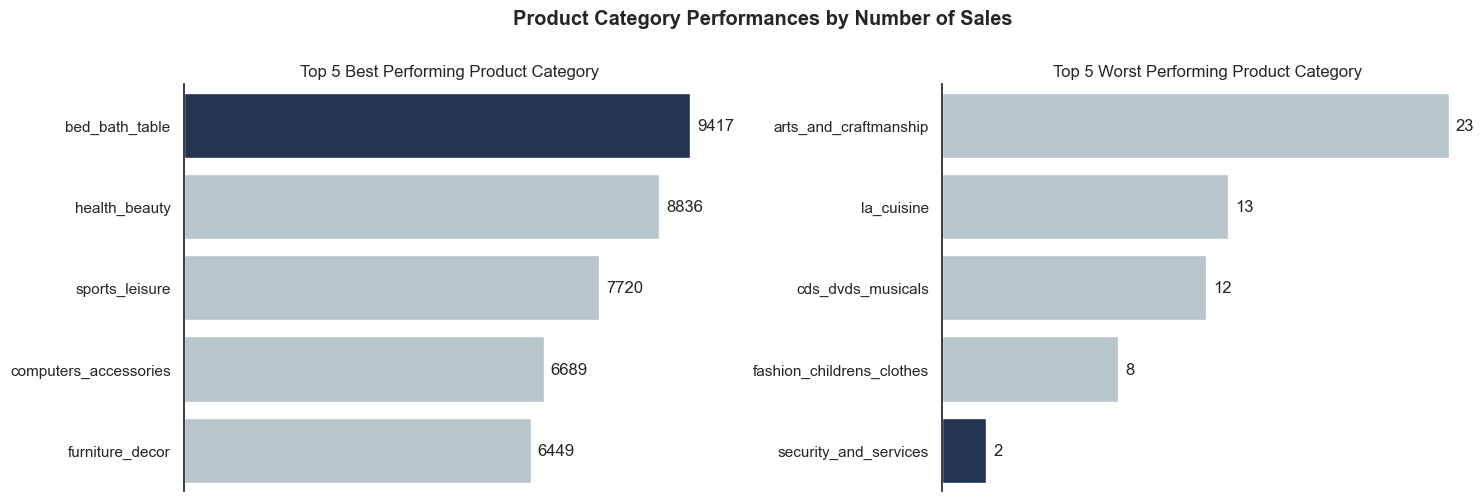

In [159]:
sns.set_theme(style="white")

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes = axes.flatten()

sns.barplot(
    product_category_sales.head(5),
    y="product_category_name_english",
    x="total_order",
    ax=axes[0],
    palette=["#1C325B", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF"],
)

for container in axes[0].containers:
    axes[0].bar_label(container, padding=5)

axes[0].set_title("Top 5 Best Performing Product Category")
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].xaxis.set_ticklabels([])
sns.despine(ax=axes[0], bottom=True)

sns.barplot(
    product_category_sales.tail(5),
    y="product_category_name_english",
    x="total_order",
    ax=axes[1],
    palette=["#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#1C325B"],
)

for container in axes[1].containers:
    axes[1].bar_label(container, padding=5)

axes[1].set_title("Top 5 Worst Performing Product Category")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].xaxis.set_ticklabels([])
sns.despine(ax=axes[1], bottom=True)

plt.suptitle(
    "Product Category Performances by Number of Sales", weight="bold", y=1, x=0.514
)
plt.tight_layout()
plt.show()

fig.savefig(
    "plot/product category performances.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

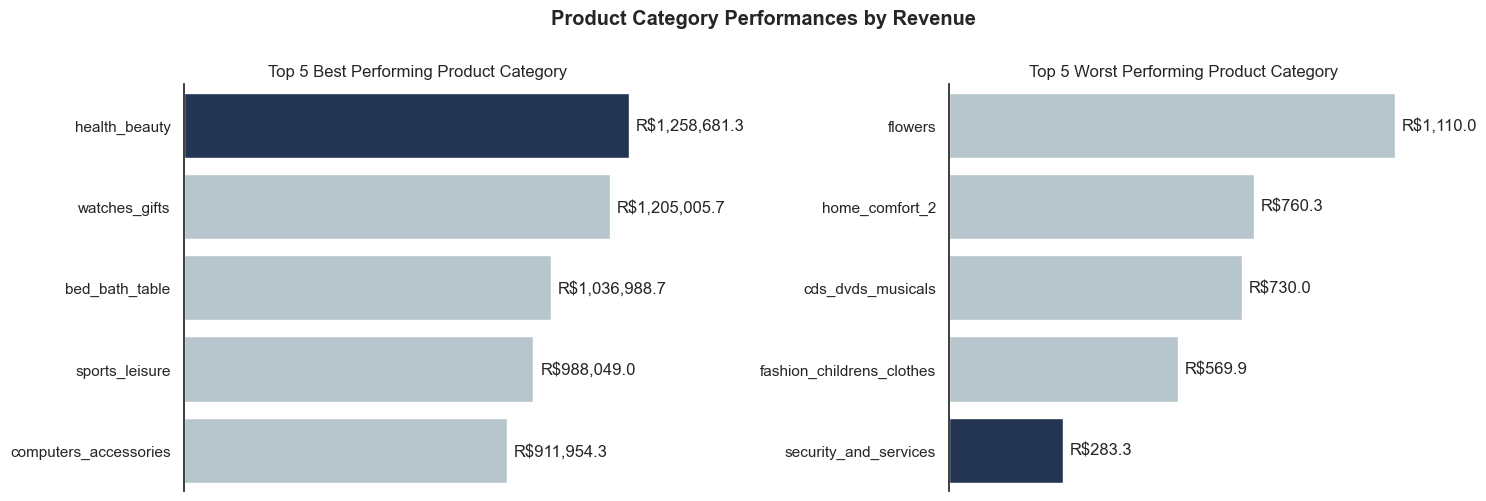

In [160]:
sns.set_theme(style="white")

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes = axes.flatten()

sns.barplot(
    product_category_sales.sort_values(by="total_price", ascending=False).head(5),
    y="product_category_name_english",
    x="total_price",
    ax=axes[0],
    palette=["#1C325B", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF"],
)

for container in axes[0].containers:
    axes[0].bar_label(container, padding=5, fmt="R${:,.1f}")

axes[0].set_title("Top 5 Best Performing Product Category")
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].xaxis.set_ticklabels([])
sns.despine(ax=axes[0], bottom=True)

sns.barplot(
    product_category_sales.sort_values(by="total_price", ascending=False).tail(5),
    y="product_category_name_english",
    x="total_price",
    ax=axes[1],
    palette=["#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#1C325B"],
)

for container in axes[1].containers:
    axes[1].bar_label(container, padding=5, fmt="R${:,.1f}")

axes[1].set_title("Top 5 Worst Performing Product Category")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].xaxis.set_ticklabels([])
sns.despine(ax=axes[1], bottom=True)

plt.suptitle("Product Category Performances by Revenue", weight="bold", y=1, x=0.514)
plt.tight_layout()
plt.show()

fig.savefig(
    "plot/product category performances by revenue.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

In [161]:
product_sales = (
    orders_customers_items.groupby(by="product_id")
    .agg(
        total_order=("order_id", "nunique"),
        total_price=("price", "sum"),
        total_freight=("freight_value", "sum"),
    )
    .sort_values(by="total_order", ascending=False)
    .reset_index()
)

In [162]:
product_sales

,product_id,total_order,total_price,total_freight
0,99a4788cb24856965c36a24e339b6058,467,"43,025.56","8,046.04"
1,aca2eb7d00ea1a7b8ebd4e68314663af,431,"37,608.90","7,211.86"
2,422879e10f46682990de24d770e7f83d,352,"26,577.22","7,624.04"
3,d1c427060a0f73f6b889a5c7c61f2ac4,323,"47,214.51","13,761.52"
4,389d119b48cf3043d311335e499d9c6b,311,"21,440.59","7,242.09"
...,...,...,...,...
32946,fff28f91211774864a1000f918ed00cc,1,18.00,3.07
32947,fff1059cd247279f3726b7696c66e44e,1,89.99,16.32
32948,ffeb228c521d5464d1f71444da96c446,1,34.99,15.10
32949,ffe9468f4d890db80b7231e86931ff37,1,750.00,32.26


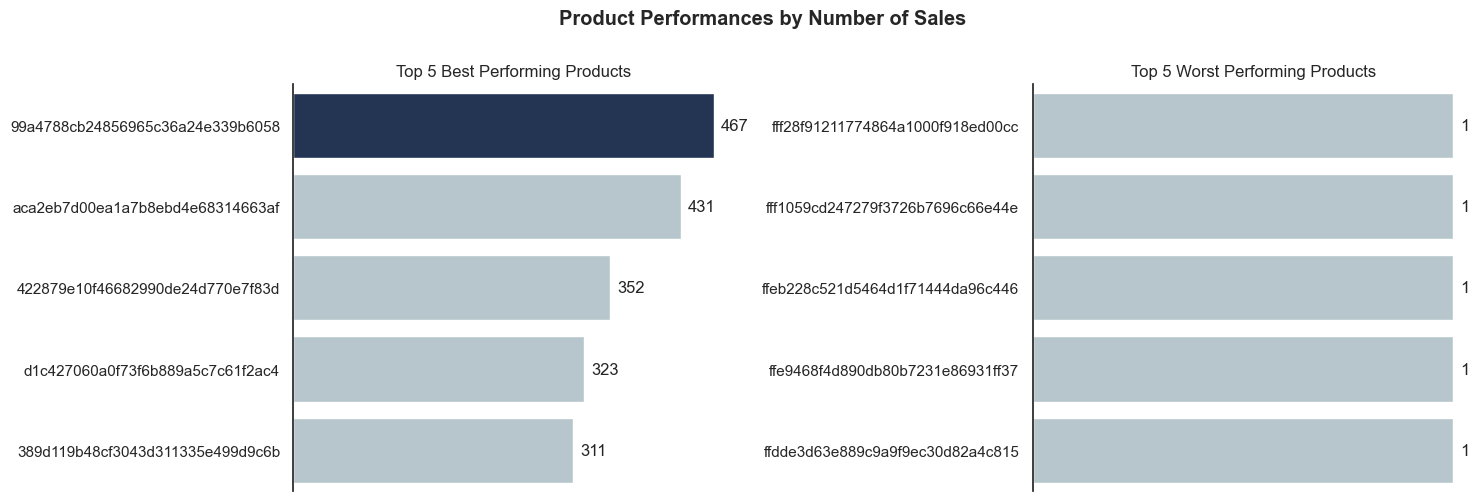

In [163]:
sns.set_theme(style="white")

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes = axes.flatten()

sns.barplot(
    product_sales.head(5),
    y="product_id",
    x="total_order",
    ax=axes[0],
    palette=["#1C325B", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF"],
)

for container in axes[0].containers:
    axes[0].bar_label(container, padding=5)

axes[0].set_title("Top 5 Best Performing Products")
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].xaxis.set_ticklabels([])
sns.despine(ax=axes[0], bottom=True)

sns.barplot(
    product_sales.tail(5),
    y="product_id",
    x="total_order",
    ax=axes[1],
    palette=["#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF"],
)

for container in axes[1].containers:
    axes[1].bar_label(container, padding=5)

axes[1].set_title("Top 5 Worst Performing Products")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].xaxis.set_ticklabels([])
sns.despine(ax=axes[1], bottom=True)

plt.suptitle("Product Performances by Number of Sales", weight="bold", y=1, x=0.514)
plt.tight_layout()
plt.show()

fig.savefig(
    "plot/product performances.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

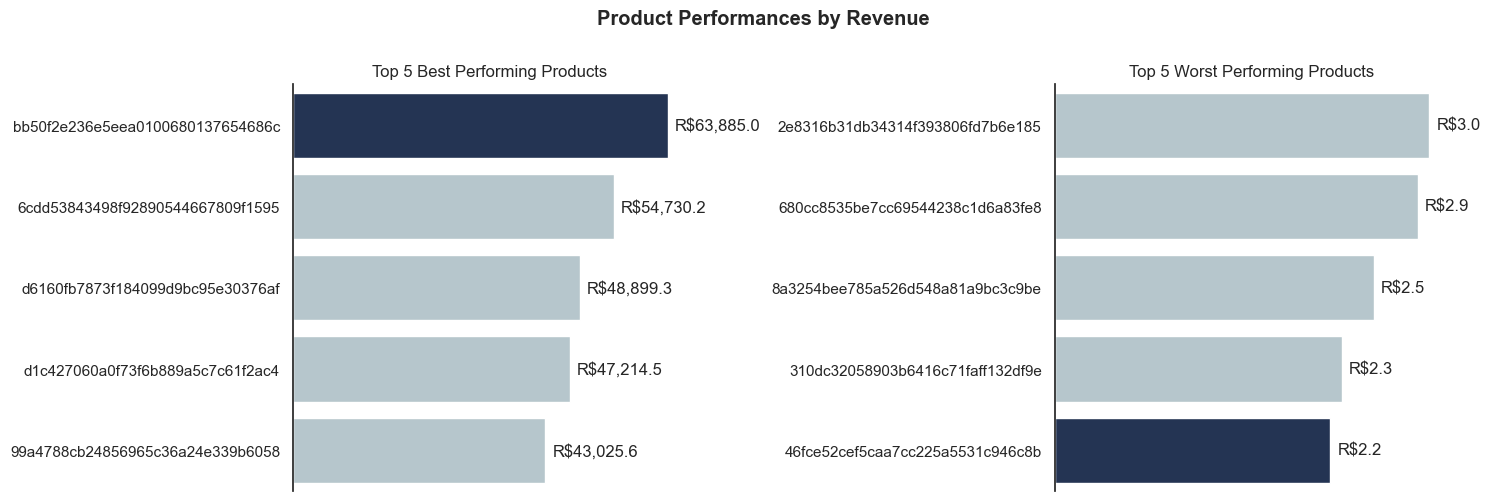

In [164]:
sns.set_theme(style="white")

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes = axes.flatten()

sns.barplot(
    product_sales.sort_values(by="total_price", ascending=False).head(5),
    y="product_id",
    x="total_price",
    ax=axes[0],
    palette=["#1C325B", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF"],
)

for container in axes[0].containers:
    axes[0].bar_label(container, padding=5, fmt="R${:,.1f}")

axes[0].set_title("Top 5 Best Performing Products")
axes[0].set_ylabel(None)
axes[0].set_xlabel(None)
axes[0].xaxis.set_ticklabels([])
sns.despine(ax=axes[0], bottom=True)

sns.barplot(
    product_sales.sort_values(by="total_price", ascending=False).tail(5),
    y="product_id",
    x="total_price",
    ax=axes[1],
    palette=["#B3C8CF", "#B3C8CF", "#B3C8CF", "#B3C8CF", "#1C325B"],
)

for container in axes[1].containers:
    axes[1].bar_label(container, padding=5, fmt="R${:,.1f}")

axes[1].set_title("Top 5 Worst Performing Products")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].xaxis.set_ticklabels([])
sns.despine(ax=axes[1], bottom=True)

plt.suptitle("Product Performances by Revenue", weight="bold", y=1, x=0.514)
plt.tight_layout()
plt.show()

fig.savefig(
    "plot/product performances by revenue.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

**Insight:**
- kategori produk yang yang paling banyak terjual adalah bed_bath_table dengan total penjualan sebanyak 9417 item produk. sementara untuk produk yang paling sedikit terjual adalah kategori security_and_services sebanyak 2 item saja.
- kategori produk yang paling banyak menyumbangkan keuntungan bagi perusahaan adalah health_and_beauty dengan total revenue drkitsr R$ 1.25 Juta fidudul oleh kategori watches_gifts dengan pendapatan sekitar R$ 1.2 juta hal ini menarik karena kategori produk watches_gifts tidak masuk kedalam top 5 sale terbanyak, namun mampu memberikan revenue kedua tertinggi untuk perusahaan. sementara untuk produk yang menyumbang revenue paling sedikit adalah security_and_services terntu hal ini sejalan dengan insight yang didapat pada point pertama.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4, 5, 6: RFM Analysis

- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [167]:
orders_customers_items["order_purchase_timestamp"].max()

Timestamp('2018-09-03 09:06:57')

In [165]:
rfm_df[["customer_unique_id", "customer_label_id"]]

,customer_unique_id,customer_label_id
0,0000366f3b9a7992bf8c76cfdf3221e2,C0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,C1
2,0000f46a3911fa3c0805444483337064,C2
3,0000f6ccb0745a6a4b88665a16c9f078,C3
4,0004aac84e0df4da2b147fca70cf8255,C4
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,C95415
95416,fffea47cd6d3cc0a88bd621562a9d061,C95416
95417,ffff371b4d645b6ecea244b27531430a,C95417
95418,ffff5962728ec6157033ef9805bacc48,C95418


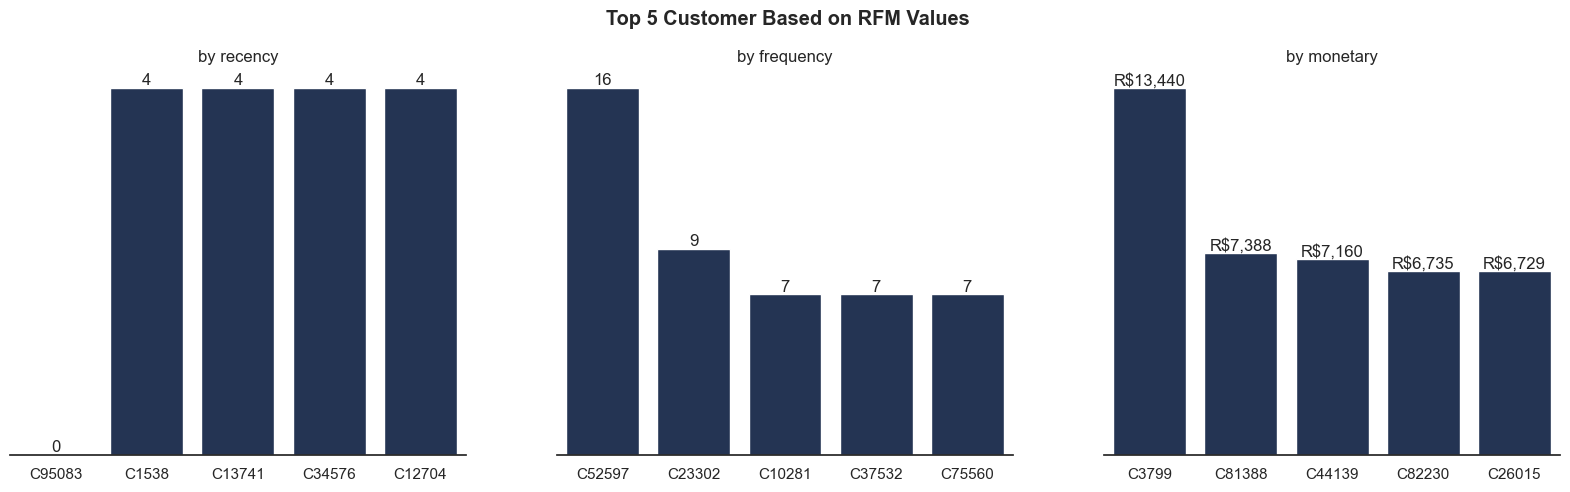

In [166]:
sns.set_theme(style="white")

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

axes = axes.flatten()

for i, col in enumerate(["recency", "frequency", "monetary"]):
    sns.barplot(
        rfm_df.sort_values(
            by=col, ascending=[True if col == "recency" else False]
        ).head(5),
        x="customer_label_id",
        y=col,
        ax=axes[i],
        palette=["#1C325B"],
    )

    for container in axes[i].containers:
        if col == "monetary":
            axes[i].bar_label(container, fmt="R${:,.0f}")
        else:
            axes[i].bar_label(container)

    axes[i].set_title(f"by {col}")
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
    axes[i].yaxis.set_ticklabels([])
    sns.despine(ax=axes[i], left=True)


plt.suptitle("Top 5 Customer Based on RFM Values", weight="bold", y=1, x=0.514)
# plt.tight_layout()
plt.show()

fig.savefig(
    "plot/rfm.jpg",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)

**Insight:**
- pada analisis rfm, pelanggan yang memiliki nilai recency rendah, frequency tinggi, dan monetary tinggi merupakan pelanggan yang valuable untuk perusahaan. visualisasi diatas menunjukan top 5 dari pelanggan dengan nilai recency (interaksi terbaru) paling rendah yang berarti pelanggan-pelanggan tersebut melakukan transaksi terakhir kurang dari 24 jam dari waktu pemesanan paling terbaru. kemudian disajikan juga top 5 pelanggan dengan nilai frequancy tertinggi. mengindikasikan pelanggan-pelanggan tersebut sering melakukan transaksi dengan transaksi terbanyak yaitu sebanyak 15 kali. berikutnya ditampilkan juga top 5 monetary dari pelanggan yang berarti pelanggan-pelanggan tersebut menghabiskan uang terbanyak dengan nilai tertinggi yaitu R$ 13,440

## Conclusion

- Penjualan dan revenue perusahaan menunjukkan tren yang fluktuatif, dengan lonjakan signifikan pada 24 November 2017, yang bertepatan dengan *Black Friday*, hari belanja tahunan dengan diskon besar yang jatuh pada Jumat di minggu keempat bulan November. Namun, setelah 6 Agustus 2018, perusahaan mulai mengalami tren penurunan baik dalam jumlah penjualan maupun revenue.
- sebaran pelanggan perusahaan tersebar di 4119 kota dengan sebaran pelanggan paling banyak adalah kota sao paulo dan rio de jenairo.
- Kategori produk *bed_bath_table* menjadi yang paling banyak terjual dengan total 9.417 item, sedangkan *security_and_services* adalah yang paling sedikit terjual dengan hanya 2 item. Namun, dari sisi pendapatan, kategori *health_and_beauty* memberikan kontribusi terbesar dengan total revenue sekitar R$ 1,25 juta, diikuti oleh *watches_gifts* sebesar R$ 1,2 juta. Hal ini menarik karena meskipun *watches_gifts* tidak termasuk dalam 5 kategori teratas berdasarkan jumlah penjualan, produk ini mampu memberikan pendapatan tertinggi kedua. Sebaliknya, *security_and_services* mencatat pendapatan paling rendah, sejalan dengan jumlah penjualannya yang juga paling sedikit.
- Pada analisis RFM, pelanggan dengan nilai *recency* rendah, *frequency* tinggi, dan *monetary* tinggi dianggap sebagai pelanggan yang paling valuable bagi perusahaan. Visualisasi menunjukkan bahwa lima pelanggan dengan *recency* terendah melakukan transaksi terakhir sekitar 1 bulan 20 hari dari waktu pemesanan terbaru. Selain itu, lima pelanggan dengan *frequency* tertinggi tercatat melakukan transaksi hingga 15 kali, menunjukkan frekuensi pembelian yang tinggi. Di sisi lain, lima pelanggan dengan *monetary* tertinggi menghabiskan uang paling banyak, dengan nilai tertinggi mencapai R$ 13.440.